In [44]:
import numpy as np
import pandas as pd
import csv
from IPython.display import HTML, display
import tabulate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [6]:
def readData():    
    patientdata = pd.read_csv('../mfcc_features_patient.csv', delimiter=' ')
    healthydata = pd.read_csv('../mfcc_features_healthy.csv', delimiter=' ')
    
    return patientdata, healthydata

In [7]:
def createSamplesAndLabels(patient_df, healthy_df):
    print(len(healthy_df), len(patient_df))
    listofzeros = [0] * len(healthy_df)
    listofones = [1] * len(patient_df)
    
    patient_df['Label'] = listofones
    healthy_df['Label'] = listofzeros

    patient_samples = patient_df.to_numpy()
    healthy_samples = healthy_df.to_numpy()

    samples = np.vstack((patient_samples, healthy_samples))
#     print(samples[0], '\n', samples[120])
    np.random.shuffle(samples)

    # actual label of frame 1-patient; 0-healthy
    labels = samples[:,-1]
    labels = labels.astype(int)
    samples = np.delete(samples, -1, 1)
    
    # audio number to which the frame belongs
    # audio number: first digit represents healthy(0)/patient(1) - rest of the digits 
    # represent the audio number in each of healthy and patient
    audio_num = samples[:,-1]
    audio_num = audio_num.astype(int)
    samples = np.delete(samples, -1, 1)
#     print(len(samples), len(labels))

    return samples, labels, audio_num

In [17]:
from sklearn.svm import SVC

def svm(training_samples, training_labels, test_samples):
    clf = SVC(kernel="linear")
    clf.fit(training_samples, training_labels)
#     print("Training complete\n")
    return clf.predict(test_samples)

In [9]:
from sklearn.cluster import KMeans

def kMeans(training_samples, training_labels, test_samples):
    kmeans = KMeans(n_clusters=2, random_state=0)
    kmeans.fit(training_samples, training_labels)
    return kmeans.predict(test_samples)

In [10]:
from sklearn.ensemble import RandomForestClassifier

def rf(training_samples, training_labels, test_samples):
    clf = RandomForestClassifier(random_state=1, n_estimators=300)
    clf.fit(training_samples, training_labels)
    return clf.predict(test_samples)

In [11]:
def calculate_cm_recall_precision(testlabels, y_true):
    y_pred = list(testlabels)
    labels = [0, 1]
    recall = recall_score(y_true, y_pred, labels, average=None)
    precision = precision_score(y_true, y_pred,labels, average=None)
    f1 = f1_score(y_true, y_pred,labels, average=None)
    return confusion_matrix(y_true, y_pred), recall, precision, f1;

In [12]:
patient_df, healthy_df = readData();
samples, labels, audio_num = createSamplesAndLabels(patient_df, healthy_df)

1083 2173


In [13]:
samples = samples.astype(np.float)
labels = labels.astype(np.float)
# print(type(samples), type(samples[0][0]))

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=0.33)

In [32]:
predicted_test_labels_svm = svm(X_train, y_train, X_test)

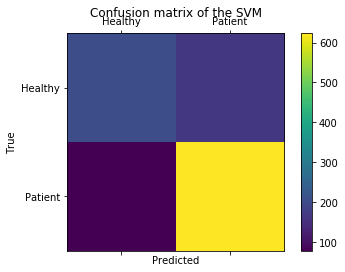

Random Forest,,
Metric,Healthy,Patient
Recall,0.553475935828877,0.8887303851640513
Precision,0.7263157894736842,0.7886075949367088
F1-Score,0.6282245827010622,0.835680751173709
Accuracy,0.772093023255814,


In [48]:
cm_svm, recall_svm, precision_svm, f1_svm = calculate_cm_recall_precision(predicted_test_labels_svm, y_test)
# plt.matshow(cm)
acc_svm = accuracy_score(predicted_test_labels_svm, y_test)

labels = ['Healthy', 'Patient']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_svm)
plt.title('Confusion matrix of the SVM')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# print("cm", cm_svm, "\nrecall", recall_svm, "\nprecision", precision_svm, "\nf1:", f1_svm)
# print("meanf1:", np.mean(f1_svm))

answer_svm = [['Random Forest'],
                  ["Metric", "Healthy", "Patient"],
                  ["Recall", recall_svm[0], recall_svm[1]],
                  ["Precision", precision_svm[0], precision_svm[1]],
                  ["F1-Score", f1_svm[0], f1_svm[1]],
               ["Accuracy", acc_svm],
                 ]

display(HTML(tabulate.tabulate(answer_svm, tablefmt='html')))

In [37]:
predicted_test_labels_k = kMeans(X_train, y_train, X_test)

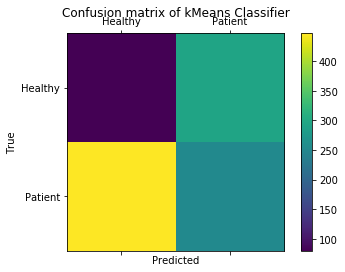

kMeans,,
Metric,Healthy,Patient
Recall,0.21390374331550802,0.362339514978602
Precision,0.15180265654648956,0.4635036496350365
F1-Score,0.1775804661487236,0.4067253803042434
Accuracy,0.31069767441860463,


In [47]:
cm_k, recall_k, precision_k, f1_k = calculate_cm_recall_precision(predicted_test_labels_k, y_test)
# plt.matshow(cm)
acc_k = accuracy_score(predicted_test_labels_k, y_test)


labels = ['Healthy', 'Patient']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_k)
plt.title('Confusion matrix of kMeans Classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

answer_k = [['kMeans'],
                  ["Metric", "Healthy", "Patient"],
                  ["Recall", recall_k[0], recall_k[1]],
                  ["Precision", precision_k[0], precision_k[1]],
                  ["F1-Score", f1_k[0], f1_k[1]],
            ["Accuracy", acc_k],
                 ]

display(HTML(tabulate.tabulate(answer_k, tablefmt='html')))

# print("cm", cm_k, "\nrecall", recall_k, "\nprecision", precision_k, "\nf1:", f1_k)
# print("meanf1:", np.mean(f1_k))

In [39]:
predicted_test_labels_r = rf(X_train, y_train, X_test)

0.7683720930232558


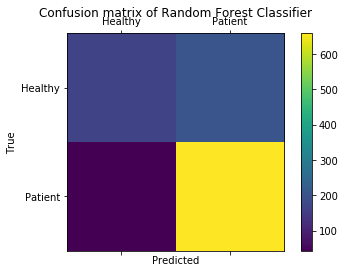

Random Forest,,
Metric,Healthy,Patient
Recall,0.44919786096256686,0.9386590584878745
Precision,0.7962085308056872,0.7615740740740741
F1-Score,0.5743589743589743,0.8408945686900958
Accuracy,0.7683720930232558,


In [46]:
cm_r, recall_r, precision_r, f1_r = calculate_cm_recall_precision(predicted_test_labels_r, y_test)
# plt.matshow(cm)

acc_r = accuracy_score(predicted_test_labels_r, y_test)
# print(acc_r)

labels = ['Healthy', 'Patient']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_r)
plt.title('Confusion matrix of Random Forest Classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

answer_r = [['Random Forest'],
                  ["Metric", "Healthy", "Patient"],
                  ["Recall", recall_r[0], recall_r[1]],
                  ["Precision", precision_r[0], precision_r[1]],
                  ["F1-Score", f1_r[0], f1_r[1]],
                ["Accuracy", acc_r],
                 ]

display(HTML(tabulate.tabulate(answer_r, tablefmt='html')))

# print("cm", cm_r, "\nrecall", recall_r, "\nprecision", precision_r, "\nf1:", f1_r)
# print("meanf1:", np.mean(f1_r))